NLP has the goal of deriving information out of natural language (could be sequence of text or speech)

Common term of NLP - seq2seq 

In [109]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [110]:
# Loading libraries

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import zipfile
import os
import datetime
import pandas as pd



#Get the dataset

In [111]:
# Getting dataset from kaggle
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-10-20 23:48:10--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.3’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2022-10-20 23:48:10 (73.8 MB/s) - ‘nlp_getting_started.zip.3’ saved [607343/607343]



In [112]:
# Unzip the data

def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [113]:
unzip_data = unzip_data("nlp_getting_started.zip")

# Visualize the Data

In [114]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [115]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [116]:
train_df_shuffled = train_df.sample(frac =1, random_state = 42)

In [117]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [86]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [87]:
len(train_df), len(test_df)

(7613, 3263)

In [88]:
# Split data into training and validation set

from sklearn.model_selection import train_test_split

In [89]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [90]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

# Convert text into numerical values - TOKENIZATION , EMBEDDING
# TEXT Vectorization

In [78]:
# To find the max_tokens

round(sum(len(l.split()) for l in train_sentences))

102087

In [79]:
# To find the output_sequence length 

round(sum(len(l.split()) for l in train_sentences)/len(train_sentences))

15

In [80]:
# Using the default parameters
text_vectorizer = TextVectorization(max_tokens = 10000,
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None,
                                    output_mode = "int",
                                    output_sequence_length = 15)

In [81]:
text_vectorizer.adapt(train_sentences)

In [75]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

#Embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = 10000,
                             output_dim = 128,
                             input_length = 15)

# **Models**

1. Naive Bayes with TF-IDF Encoder (baseline)
2. Feed-Forward Neural Network (dense Model)
3. LSTM (RNN)
4. GRU (RNN)
5. Bidirectional -LSTM (RNN)
6. 1D Convolutional Neural Network
7. Tensorflow Hub Pretained Feature Extractor
8. Tensorflow Hub Pretrained Feature Extractor (10% of Data)

## **Steps in Modelling**
1. Create a model
2. Build a model
3. Fit a model
4. Evaluate a model

# Model 1 - Naive Bayes - Baseline Model


In [71]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([("tfidf", TfidfVectorizer()), ("clf", MultinomialNB()) ])

#Fit the pipeline
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [72]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)

In [73]:
# Creating a evaluation function for the model experiements

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy, "precision": model_precision, "recall": model_recall, "f1": model_f1}
  return model_results


In [74]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 2 - Feed Forward Neural Network (A Simple Dense Model)


In [69]:
# BUild the model withfunctional API

# Create the model that uses the vectorize text layer  
model_2 = tf.keras.models.Sequential(name = "model_1_dense")
model_2.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_2.add(text_vectorizer)
model_2.add(embedding)
model_2.add(tf.keras.layers.GlobalMaxPool1D())
model_2.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


In [70]:
model_2.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
model_2.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_2_history = model_2.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 7s 24ms/step - loss: 0.6362 - accuracy: 0.6491 - val_loss: 0.5718 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.4702 - accuracy: 0.8289 - val_loss: 0.4787 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.3419 - accuracy: 0.8764 - val_loss: 0.4565 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.2582 - accuracy: 0.9070 - val_loss: 0.4569 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1969 - accuracy: 0.9346 - val_loss: 0.4698 - val_accuracy: 0.7887


In [37]:
# Make predictions
model_2_pred_prob = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_prob))

model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

24/24 [==============================] - 0s 3ms/step


{'accuracy': 78.87139107611549,
 'precision': 0.7909484312997928,
 'recall': 0.7887139107611548,
 'f1': 0.7867378765635805}

Visualizing word embeddings

In [38]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab[:20]

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this']

In [39]:
# Get the weight matrix of embedding layer
# These are the numerical representations of each token in our training data

embed_weights = model_2.get_layer("embedding").get_weights()

In [40]:
embed_weights

[array([[-0.03171553, -0.03865974, -0.01887484, ..., -0.03683871,
         -0.09531122, -0.09215274],
        [-0.034966  , -0.03977262, -0.01384629, ..., -0.05155024,
         -0.0905717 , -0.04404102],
        [-0.04172551, -0.03513377, -0.01692634, ..., -0.04990802,
         -0.04866136, -0.06494436],
        ...,
        [ 0.00324087, -0.0268554 ,  0.00665703, ...,  0.03680204,
         -0.02820462,  0.02544557],
        [ 0.04358381, -0.03893875, -0.0387092 , ..., -0.03339775,
          0.02838428, -0.02735684],
        [ 0.00322571, -0.02660009,  0.01359952, ..., -0.0165061 ,
         -0.04983028, -0.06458993]], dtype=float32)]

In [41]:
embed_weights[0].shape

(10000, 128)

# Model - 3 LSTM (RNN) 

In [42]:
from tensorflow.keras import layers

model_3 = tf.keras.models.Sequential(name = "model_3_dense")
model_3.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_3.add(text_vectorizer)
model_3.add(embedding)
#model_2.add(tf.keras.layers.LSTM(64, return_sequences = True))
model_3.add(tf.keras.layers.LSTM(64))
model_3.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


In [43]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
model_3.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_3_history = model_3.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 13s 49ms/step - loss: 0.3877 - accuracy: 0.8260 - val_loss: 0.4542 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.2462 - accuracy: 0.9037 - val_loss: 0.5262 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1736 - accuracy: 0.9356 - val_loss: 0.5736 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1308 - accuracy: 0.9523 - val_loss: 0.6252 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1030 - accuracy: 0.9635 - val_loss: 0.7592 - val_accuracy: 0.7795


In [45]:
# Make predictions
model_3_pred_prob = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_prob))

model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

24/24 [==============================] - 1s 6ms/step


{'accuracy': 77.95275590551181,
 'precision': 0.7849754984084437,
 'recall': 0.7795275590551181,
 'f1': 0.7761172470890804}

# Model - 4 GRU (RNN) 

In [46]:
#from tensorflow.keras import layers

model_4 = tf.keras.models.Sequential(name = "model_4_dense")
model_4.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_4.add(text_vectorizer)
model_4.add(embedding)
model_4.add(tf.keras.layers.GRU(64, return_sequences = True))
model_4.add(tf.keras.layers.GRU(64))
model_4.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


In [47]:
model_4.summary()

Model: "model_4_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,342,273
Trainable params: 1,342,273
Non-trainable params: 0
___________________________________________

In [48]:
# Compile the model
model_4.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_4_history = model_4.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 42ms/step - loss: 0.1841 - accuracy: 0.9235 - val_loss: 0.7438 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0969 - accuracy: 0.9644 - val_loss: 0.8129 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0735 - accuracy: 0.9730 - val_loss: 0.7343 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0669 - accuracy: 0.9746 - val_loss: 0.9711 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 9s 44ms/step - loss: 0.0528 - accuracy: 0.9762 - val_loss: 1.1480 - val_accuracy: 0.7677


In [49]:
# Make predictions
model_4_pred_prob = model_4.predict(val_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_prob))

model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

24/24 [==============================] - 1s 6ms/step


{'accuracy': 76.77165354330708,
 'precision': 0.7715939358671309,
 'recall': 0.7677165354330708,
 'f1': 0.7645288433434009}

# Model - 5 Bidirectional LSTM (RNN)


In [50]:
model_5 = tf.keras.models.Sequential(name = "model_5_bidirectional")
model_5.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_5.add(text_vectorizer)
model_5.add(embedding)
model_5.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model_5.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [51]:
model_5.summary()

Model: "model_5_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile the model
model_5.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_5_history = model_5.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 43ms/step - loss: 0.1345 - accuracy: 0.9559 - val_loss: 0.9687 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0603 - accuracy: 0.9740 - val_loss: 0.9654 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0497 - accuracy: 0.9783 - val_loss: 1.2425 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0463 - accuracy: 0.9788 - val_loss: 1.4607 - val_accuracy: 0.7362
Epoch 5/5
215/215 [==============================] - 9s 44ms/step - loss: 0.0440 - accuracy: 0.9810 - val_loss: 1.4920 - val_accuracy: 0.7585


In [53]:
# Make predictions
model_5_pred_prob = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_prob))

model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

24/24 [==============================] - 1s 6ms/step


{'accuracy': 75.8530183727034,
 'precision': 0.7642444452897494,
 'recall': 0.7585301837270341,
 'f1': 0.7542580254391278}

# Convolutional Neural Networks for Text

#Model 6

Inputs -> Tokensization -> Embedding -> (conv1d+pooling) layers -> output

In [54]:
model_6 = tf.keras.models.Sequential(name = "model_6_CNN")
model_6.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_6.add(text_vectorizer)
model_6.add(embedding)
model_6.add(tf.keras.layers.Conv1D(filters = 128, kernel_size=5, strides=1, activation = "relu", padding = "valid"))
model_6.add(tf.keras.layers.GlobalMaxPool1D())
model_6.add(tf.keras.layers.Dense(64, activation = "relu"))
model_6.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [55]:
model_6.summary()

Model: "model_6_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 128)           82048     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 

In [56]:
# Compile the model
model_6.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_6_history = model_5.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0425 - accuracy: 0.9804 - val_loss: 1.4734 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0379 - accuracy: 0.9818 - val_loss: 1.5904 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0359 - accuracy: 0.9825 - val_loss: 1.6001 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0342 - accuracy: 0.9835 - val_loss: 1.6605 - val_accuracy: 0.7428
Epoch 5/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0392 - accuracy: 0.9810 - val_loss: 1.5891 - val_accuracy: 0.7362


In [57]:
# Make predictions
model_6_pred_prob = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_prob))

model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

24/24 [==============================] - 0s 4ms/step


{'accuracy': 54.59317585301837,
 'precision': 0.7526523000414422,
 'recall': 0.5459317585301837,
 'f1': 0.38840356199086695}

# Model 7 - Tensorflow Hub Pretrained Sentence Encoder

Inputs -> Embedding layer (USE from TensforFlow Hub) -> Dense Layer(Decodes the sequences into desired output) -> Outputs 

In [58]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings[0].shape)

(512,)


**Using Transfer Learning for NLP, specially using tensorflow Hub's universal sentence encoder**

In [59]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE"
                                        )


In [91]:
model_7 = tf.keras.models.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
], name = "model_7_USE")


model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [92]:
# Fit the model
model_7_history = model_7.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 15,
                              validation_data = (val_sentences, val_labels))

Epoch 1/15
215/215 [==============================] - 5s 16ms/step - loss: 0.4875 - accuracy: 0.7900 - val_loss: 0.4439 - val_accuracy: 0.8071
Epoch 2/15
215/215 [==============================] - 3s 13ms/step - loss: 0.4097 - accuracy: 0.8187 - val_loss: 0.4344 - val_accuracy: 0.8136
Epoch 3/15
215/215 [==============================] - 3s 13ms/step - loss: 0.3960 - accuracy: 0.8232 - val_loss: 0.4310 - val_accuracy: 0.8163
Epoch 4/15
215/215 [==============================] - 3s 13ms/step - loss: 0.3843 - accuracy: 0.8320 - val_loss: 0.4270 - val_accuracy: 0.8123
Epoch 5/15
215/215 [==============================] - 3s 13ms/step - loss: 0.3747 - accuracy: 0.8349 - val_loss: 0.4319 - val_accuracy: 0.8150
Epoch 6/15
215/215 [==============================] - 3s 13ms/step - loss: 0.3663 - accuracy: 0.8396 - val_loss: 0.4265 - val_accuracy: 0.8189
Epoch 7/15
215/215 [==============================] - 3s 13ms/step - loss: 0.3549 - accuracy: 0.8427 - val_loss: 0.4291 - val_accuracy: 0.8150

In [93]:
# Make predictions
model_7_pred_prob = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_prob))

model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

24/24 [==============================] - 1s 11ms/step


{'accuracy': 82.02099737532808,
 'precision': 0.8210875591779185,
 'recall': 0.8202099737532809,
 'f1': 0.8192635530876636}

# Model 7: TF HUb Pretrained USE but with 10% of the data

In [63]:
train_10_percent_split = int(len(train_sentences)*0.10)
train_sentences_10_percent =  train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [64]:
# To create a model the same as the previous model - cloning the model

model_8 = tf.keras.models.clone_model(model_7)
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_8.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,871,809
Trainable params: 73,985
Non-trainable params: 256,797,824
_________________________________________________________________


In [65]:
# Fit the model
model_8_history = model_8.fit(x = train_sentences_10_percent,
                              y = train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 4s 50ms/step - loss: 0.6573 - accuracy: 0.6686 - val_loss: 0.6215 - val_accuracy: 0.7244
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5153 - accuracy: 0.8131 - val_loss: 0.5043 - val_accuracy: 0.7808
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.3999 - accuracy: 0.8321 - val_loss: 0.4884 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.3311 - accuracy: 0.8642 - val_loss: 0.5063 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.2760 - accuracy: 0.8934 - val_loss: 0.5321 - val_accuracy: 0.7638


In [66]:
# Make predictions
model_8_pred_prob = model_8.predict(val_sentences)
model_8_preds = tf.squeeze(tf.round(model_8_pred_prob))

model_8_results = calculate_results(val_labels, model_8_preds)
model_8_results

24/24 [==============================] - 1s 13ms/step


{'accuracy': 76.37795275590551,
 'precision': 0.76369847151459,
 'recall': 0.7637795275590551,
 'f1': 0.7626922180365151}

#Comparing the results of the models

In [94]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "Simple_dense_model": model_2_results,
                                  "LSTM":model_3_results,
                                  "GRU": model_4_results,
                                  "LSTM-Bidirectional": model_5_results,
                                  "Conv_1D": model_6_results,
                                  "TF HUB USE Encoder": model_7_results,
                                  "TF HUB USE Encoder_10%": model_8_results
                                  })


In [105]:
all_model_results = all_model_results.transpose()


In [106]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [107]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
Simple_dense_model,0.788714,0.790948,0.788714,0.786738
LSTM,0.779528,0.784975,0.779528,0.776117
GRU,0.767717,0.771594,0.767717,0.764529
LSTM-Bidirectional,0.758530,0.764244,0.758530,0.754258
Conv_1D,0.545932,0.752652,0.545932,0.388404
TF HUB USE Encoder,0.820210,0.821088,0.820210,0.819264
TF HUB USE Encoder_10%,0.763780,0.763698,0.763780,0.762692


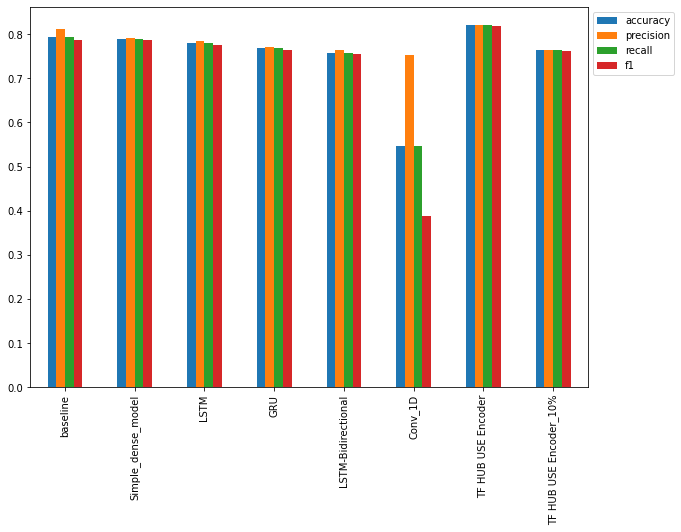

In [108]:
# plot

all_model_results.plot(kind = "bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))